Реализовать программу для численного интегрирования систем ОДУ явным
методом Рунге-Кутты 1 и 4 порядков и решить задачу Коши:

$$x'' = - x + \varepsilon (1 - x^2); \ \ x_{0} = 1; \ \ x_{0}' = 1; \ \ \varepsilon \geqslant 0$$ 

1. Реализовать два численных метода (ЯМРК1 и ЯМРК4).
2. Счёт должен выполняться с контролем точности, т.е. шаг интегрирования должен
выбираться исходя из желаемой точности (возможны разные варианты).
3. Исследовать поведение решения при различных значениях $\varepsilon$ (включая $\varepsilon$ = 0) и
начальных приближениях и объяснить результат.
4. Для $\varepsilon$ = 0 сравнить аналитическое решение с численными решениями (ЯМРК1 и
ЯМРК4) и объяснить результат

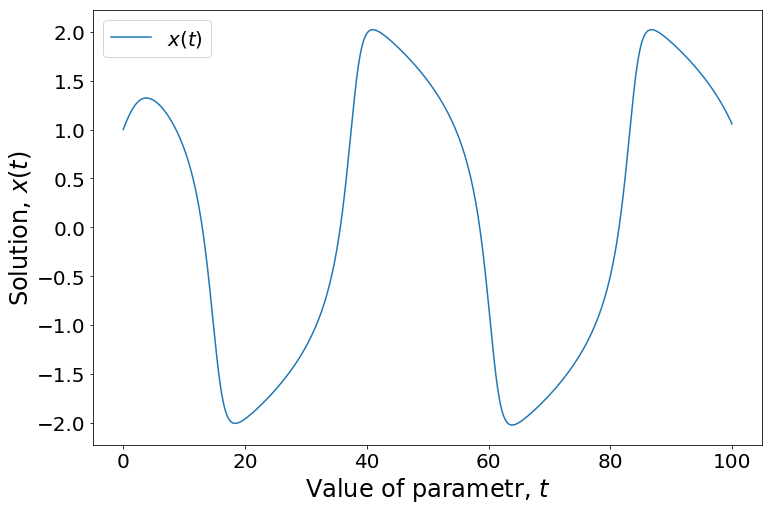

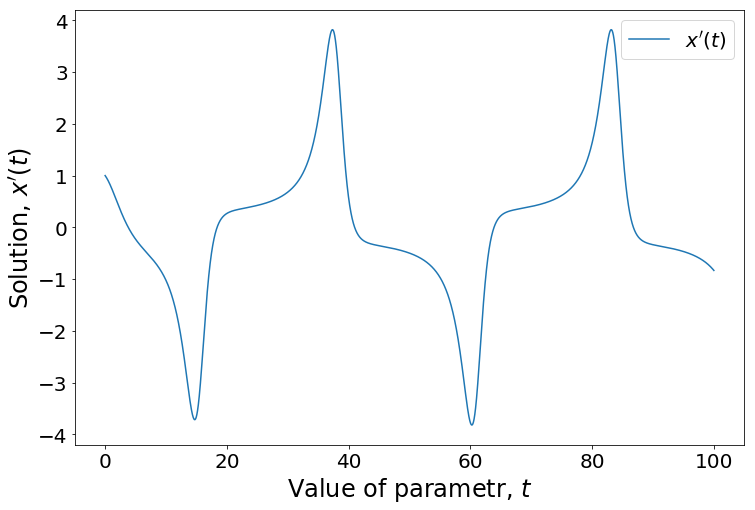

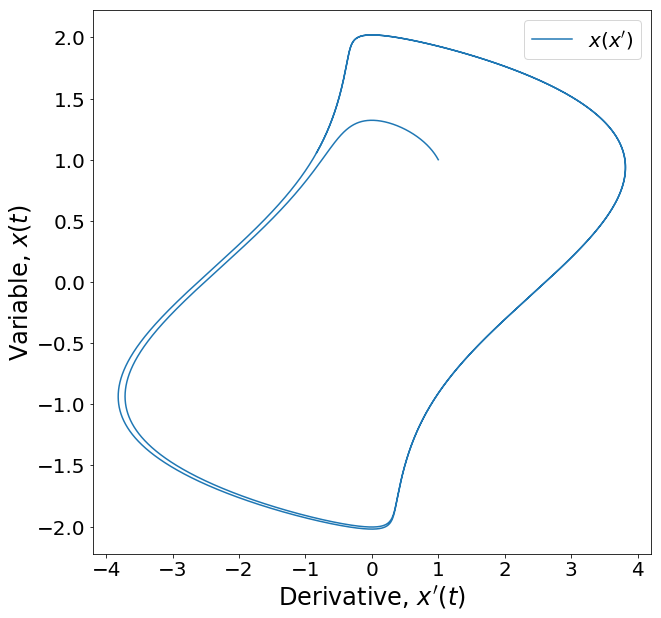

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import math

def F(x,z, epsilon):
    f = np.zeros(2)
    f[0] = z
    f[1] = epsilon*z*(1 - x**2) - x
    return f
#ЯМРК1
Y = np.zeros((2))
x = 1
z = 1
epsilon = 2
Y = [x,z]
N = 1000
val1 = np.zeros((100*N))
val1[0] = x
val2 = np.zeros((100*N))
val2[0] = z
arg = np.zeros((100*N))
arg[0] = 0
h = 1/N #желаемая точность, точность на каждом шаге - O(h)
for i in range(1,100*N):
    k1 = F(x,z, epsilon)
    Y = Y + 1/6*h*k1
    x = Y[0]
    val1[i] = x
    z = Y[1]
    val2[i] = z
    arg[i] = i*h
plt.figure(figsize=(12,8))
plt.plot(arg,val1, label=r"$x(t)$")
plt.xlabel("Value of parametr, $t$", fontsize=24)
plt.ylabel("Solution, $x(t)$", fontsize=24)
plt.legend(loc="best", fontsize=20)
plt.xticks(fontsize = 20)
_ = plt.yticks(fontsize = 20)
plt.savefig('1n_1.png')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(arg,val2, label=r"$x'(t)$")
plt.xlabel("Value of parametr, $t$", fontsize=24)
plt.ylabel("Solution, $x'(t)$", fontsize=24)
plt.legend(loc="best", fontsize=20)
plt.xticks(fontsize = 20)
_ = plt.yticks(fontsize = 20)
plt.savefig('1n_2.png')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(val2,val1, label=r"$x(x')$")
plt.xlabel("Derivative, $x'(t)$", fontsize=24)
plt.ylabel("Variable, $x(t)$", fontsize=24)
plt.legend(loc="best", fontsize=20)
plt.xticks(fontsize = 20)
_ = plt.yticks(fontsize = 20)
plt.savefig('1n_3.png')
plt.show()

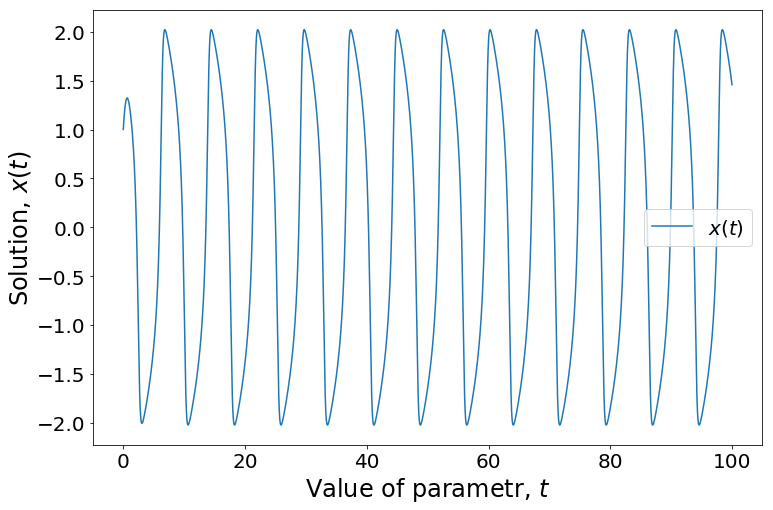

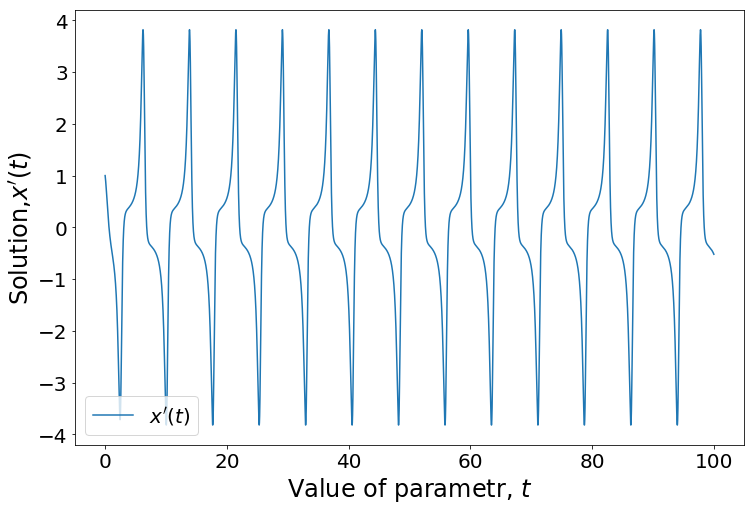

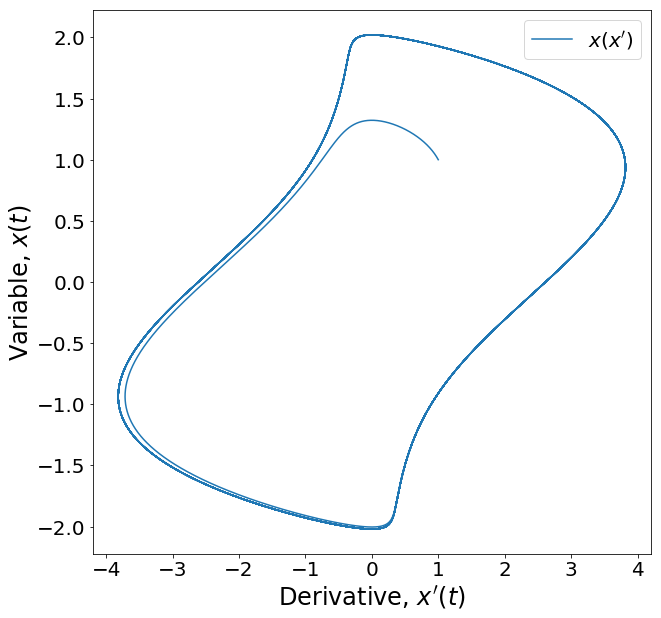

Time: 17.89777898788452 seconds


In [3]:
#ЯМРК4
import time
start_time = time.time()
Y = np.zeros((2))
x = 1
z = 1
epsilon = 2
Y = [x,z]
N = 1000
val1 = np.zeros((100*N))
val1[0] = x
val2 = np.zeros((100*N))
val2[0] = z
arg = np.zeros((100*N))
arg[0] = 0
h = 1/N #желаемая точность, точность на каждом шаге - O(h)
for i in range(1,100*N):
    k1 = F(x,z, epsilon)
    k2 = F(x + h*k1[0]/2,z + h*k1[1]/2, epsilon);
    k3 = F(x + h*k2[0]/2,z + h*k2[1]/2, epsilon);
    k4 = F(x + h*k3[0]/2,z + h*k3[1]/2, epsilon);
    Y = Y + h*(k1 + 2*k2 + 2*k3 + k4)/6
    x = Y[0]
    val1[i] = x
    z = Y[1]
    val2[i] = z
    arg[i] = i*h
    
plt.figure(figsize=(12,8))
plt.plot(arg,val1, label=r"$x(t)$")
plt.xlabel("Value of parametr, $t$", fontsize=24)
plt.ylabel("Solution, $x(t)$", fontsize=24)
plt.legend(loc="best", fontsize=20)
plt.xticks(fontsize = 20)
_ = plt.yticks(fontsize = 20)
plt.savefig('4_1.png')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(arg,val2, label=r"$x'(t)$")
plt.xlabel("Value of parametr, $t$", fontsize=24)
plt.ylabel("Solution,$x'(t)$", fontsize=24)
plt.legend(loc="best", fontsize=20)
plt.xticks(fontsize = 20)
_ = plt.yticks(fontsize = 20)
plt.savefig('4_2.png')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(val2,val1, label=r"$x(x')$")
plt.xlabel("Derivative, $x'(t)$", fontsize=24)
plt.ylabel("Variable, $x(t)$", fontsize=24)
plt.legend(loc="best", fontsize=20)
plt.xticks(fontsize = 20)
_ = plt.yticks(fontsize = 20)
plt.savefig('4_3.png')
plt.show()
print("Time: %s seconds" % (time.time() - start_time))